# Homework 1 - Methods in Experimental Particles Physics



1.   Evaluate numerically and plot graphically the convolution integral of the energy spectrum $f(E)$ with gaussian resolution $g(E)$ defined below

  $$f(E) = a_1 f_1(E) + a_2 f_2(E) + a_3 f_3(E)$$
  
  $$
  \begin{align}
  f_1 &= 1/E &\text{for } 0.1 < E < 0.95 \text{ MeV}\\
  f_1 &= 0 &\text{for } E < 0.1 \text{ or } E > 0.95 \text{ MeV} \\
  f_2 &= G(\mu = 1.2 \text{ MeV}, \sigma = 0.01  \text{ MeV})\\
  f_3 &= G(\mu = 0.5 \text{ MeV}, \sigma = 0.01  \text{ MeV})
  \end{align}
  $$

  with,

  $$
  \begin{align}
  a_1 &= 1 \\
  a_2 &= 0.5\\
  a_3 &= 0.1
  \end{align}
  $$

  In the following 4 cases:
    1. $g(E) = G(E,\sigma)$ with $\sigma / E = 5 \$% $/ \sqrt{E \text{(MeV)}}$
    2. $g(E) = G(E,\sigma)$ with $\sigma / E = 10 \$% $/ \sqrt{E \text{(MeV)}}$
    3. $g(E) = G(E,\sigma)$ with $\sigma / E = 30 \$% $/ \sqrt{E \text{(MeV)}}$
    4. $g(E) = G(E,\sigma)$ with $\sigma / E = 1 \$% $/ \sqrt{E \text{(MeV)}}$


In [117]:
import matplotlib.pyplot as plt
import numpy as np

In [118]:
# Constants definitions

a1 = 1
a2 = 0.5
a3 = 0.1

# Functions definitios

def G(E, mu, sigma):
  return 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(E - mu)**2 / (2 * sigma**2))

def f1(E):
  return 0 if E < 0.1 or E > 0.95 else 1 / E

def f2(E):
  mu = 1.2 # MeV
  sigma = 0.01 #Mev
  return G(E, mu, sigma)

def f3(E):
  mu = 0.5 # MeV
  sigma = 0.01 #Mev
  return G(E, mu, sigma)

def f(E):
  return a1 * f1(E) + a2 * f2(E) + a3 * f3(E)

def g(E, percentage):
  mu = 0
  sigma = percentage * np.sqrt(E) / 100
  return G(E, mu, sigma)

# Define the convolution function
def convolution(x, f, g):
    n = len(x)
    conv = np.zeros_like(x)
    for i in range(n):
        conv[i] = np.sum(f * np.roll(g[::-1], i))
    return conv

What is initially done is to observe how the energy spectrum behaves within a range from $0$ MeV to $1.4$ MeV.

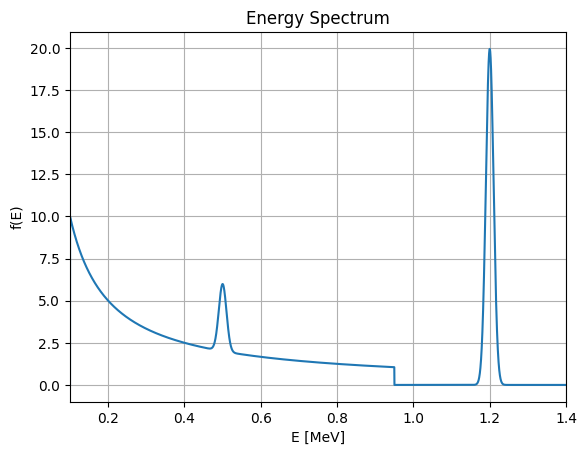

In [119]:
# Define the range and step size
E = np.linspace(0.0001, 1.4, 10000)
dE = E[1] - E[0]

F = [f(i) for i in E]
plt.plot(E,F)

plt.xlabel('E [MeV]')
plt.ylabel('f(E)')
plt.title('Energy Spectrum')
plt.xlim(0.1,1.4)
plt.grid()
plt.show()

Furthermore, we observe how the Gaussian resolutions behave.

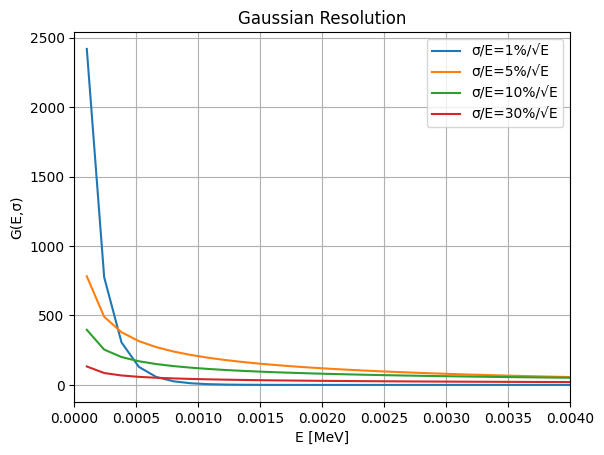

In [120]:
g_1 = [g(i, 1) for i in E]
g_5 = [g(i, 5) for i in E]
g_10 = [g(i, 10) for i in E]
g_30 = [g(i, 30) for i in E]

plt.plot(E, g_1, label="σ/E=1%/√E")
plt.plot(E, g_5, label="σ/E=5%/√E")
plt.plot(E, g_10, label="σ/E=10%/√E")
plt.plot(E, g_30, label="σ/E=30%/√E")

plt.xlabel('E [MeV]')
plt.ylabel('G(E,σ)')
plt.title('Gaussian Resolution')
plt.xlim(0.0, 0.004)
plt.legend()
plt.grid()
plt.show()


## Convolution


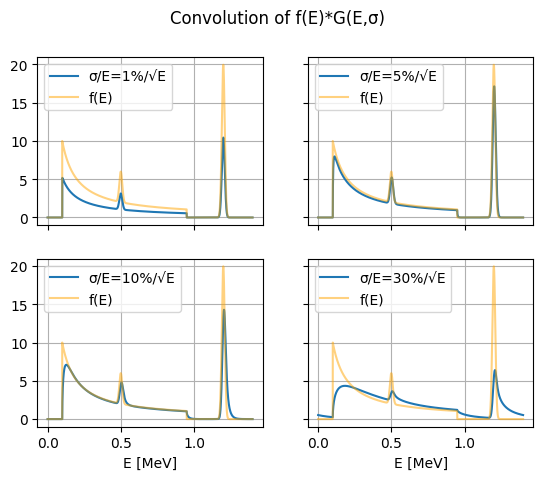

In [121]:
# Perform the convolution
convolved1 = convolution(E, F, g_1) * dE
convolved5 = convolution(E, F, g_5) * dE
convolved10 = convolution(E, F, g_10) * dE
convolved30 = convolution(E, F, g_30) * dE

fig, axs = plt.subplots(2, 2)

fig.suptitle('Convolution of f(E)*G(E,σ)')
axs[0, 0].plot(E, convolved1, label="σ/E=1%/√E")
axs[0, 1].plot(E, convolved5, label="σ/E=5%/√E")
axs[1, 0].plot(E, convolved10, label="σ/E=10%/√E")
axs[1, 1].plot(E, convolved30, label="σ/E=30%/√E")

for ax in axs.flat:
    ax.plot(E, F, color="orange", label="f(E)", alpha=0.5)
    ax.set(xlabel='E [MeV]')
    ax.legend()
    ax.grid()

for ax in fig.get_axes():
    ax.label_outer()

If the resolutions were in the following form:

  

1.   $g(E) = G(E,\sigma)$ with $\sigma / E = 5 $ %
2.   $g(E) = G(E,\sigma)$ with $\sigma / E = 10 $ %

1.   $g(E) = G(E,\sigma)$ with $\sigma / E = 30 $ %
2.   $g(E) = G(E,\sigma)$ with $\sigma / E = 1 $ %


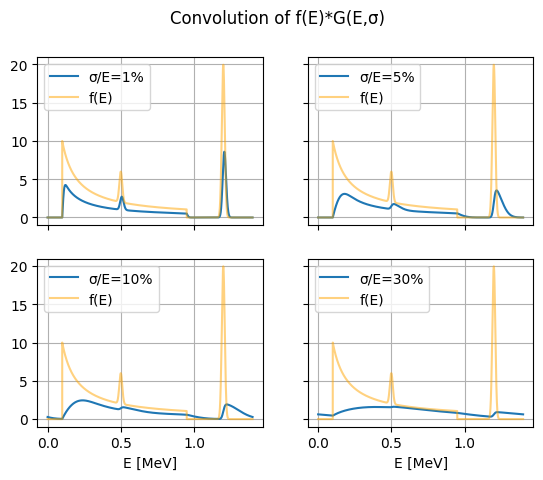

In [122]:
def g0(E, percentage):
  mu = 0
  sigma = percentage / 100
  return G(E, mu, sigma)

g0_1 = [g0(i, 1) for i in E]
g0_5 = [g0(i, 5) for i in E]
g0_10 = [g0(i, 10) for i in E]
g0_30 = [g0(i, 30) for i in E]

# Perform the convolution
c1 = convolution(E, F, g0_1) * dE
c5 = convolution(E, F, g0_5) * dE
c10 = convolution(E, F, g0_10) * dE
c30 = convolution(E, F, g0_30) * dE

fig, axs = plt.subplots(2, 2)

fig.suptitle('Convolution of f(E)*G(E,σ)')
axs[0, 0].plot(E, c1, label="σ/E=1%")
axs[0, 1].plot(E, c5, label="σ/E=5%")
axs[1, 0].plot(E, c10, label="σ/E=10%")
axs[1, 1].plot(E, c30, label="σ/E=30%")

for ax in axs.flat:
    ax.plot(E, F, color="orange", label="f(E)", alpha=0.5)
    ax.set(xlabel='E [MeV]')
    ax.legend()
    ax.grid()

for ax in fig.get_axes():
    ax.label_outer()

## Redefinition of Energy Spectrum

Here the same procedure is carried out but with the energy spectrum defined as follows.

$$f(E) = a_1 f_1(E) + a_2 f_2(E) + a_3 f_3(E)$$
  
  $$
  \begin{align}
  f_1 &= 1/ \sin{E} &\text{for } 0.1 < E < 0.95 \text{ MeV}\\
  f_1 &= 0 &\text{for } E < 0.1 \text{ or } E > 1.0 \text{ MeV} \\
  f_2 &= G(\mu = 0.7 \text{ MeV}, \sigma = 0.02  \text{ MeV})\\
  f_3 &= G(\mu = 0.5 \text{ MeV}, \sigma = 0.01  \text{ MeV})
  \end{align}
  $$

  with,

  $$
  \begin{align}
  a_1 &= 1 \\
  a_2 &= 0.3\\
  a_3 &= 0.2
  \end{align}
  $$

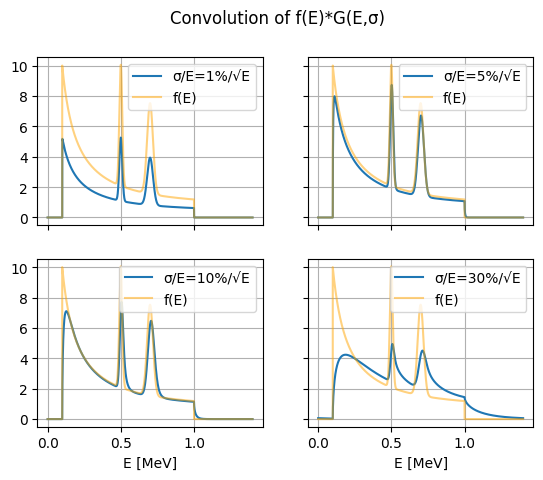

In [123]:
# Constants definitions
a1 = 1
a2 = 0.3
a3 = 0.2

f1 = lambda E: 0.0 if E < 0.1 or E > 1.0 else 1 / np.sin(E)
f2 = lambda E: G(E, 0.7, 0.02)
f3 = lambda E: G(E, 0.5, 0.01)

f = lambda E: a1 * f1(E) + a2 * f2(E) + a3 * f3(E)

F1 = [f(i) for i in E]

# Perform the convolution
convolved1 = convolution(E, F1, g_1) * dE
convolved5 = convolution(E, F1, g_5) * dE
convolved10 = convolution(E, F1, g_10) * dE
convolved30 = convolution(E, F1, g_30) * dE

fig, axs = plt.subplots(2, 2)

fig.suptitle('Convolution of f(E)*G(E,σ)')
axs[0, 0].plot(E, convolved1, label="σ/E=1%/√E")
axs[0, 1].plot(E, convolved5, label="σ/E=5%/√E")
axs[1, 0].plot(E, convolved10, label="σ/E=10%/√E")
axs[1, 1].plot(E, convolved30, label="σ/E=30%/√E")

for ax in axs.flat:
    ax.plot(E, F1, color="orange", label="f(E)", alpha=0.5)
    ax.set(xlabel='E [MeV]')
    ax.legend()
    ax.grid()

for ax in fig.get_axes():
    ax.label_outer()
